In [4]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.datasets import make_blobs

In [2]:
def logit(x,w):
    return np.dot(x,w)

def sigmoid(h):
    return 1. / (1+np.exp(-h))

In [6]:
def linear_expression(x):
    return 5 * x + 6

objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = linear_expression(X) + np.random.randn(objects_num) * 5

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [3]:
class MyLogisticRegression(object):
    def __init__(self):
        self.w = None
        
    def fit(self, X, y, max_iter = 100, lr = 0.1):
        n, k = X.shape
        
        if self.w is None:
            self.w = np.random.randn(k+1)
            
        X_train = np.concatenate((np.ones((n,1)), X), axis = 1)
        
        losses = []
        
        for i in range(max_iter):
            z = sigmoid(logit(X_train, self.get_weights()))
            grad = np.dot(X_train.T, (z-y)) / len(y)
            
            self.w -= grad * lr
            
            losses.append(self.__loss(y,z))
            
        return losses
    
    def predict_proba(self, X):
        n, k = X.shape
        
        X_ = np.concatenate((np.ones((n,1)), X), axis = 1)
        return sigmoid(logit(X_, self.w))
    
    def predict(self, X, threshold = 0.5):
        return self.predict_proba(X) >= threshold
    
    def get_weights(self):
        return self.w
    
    def __loss(self, y, p):
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

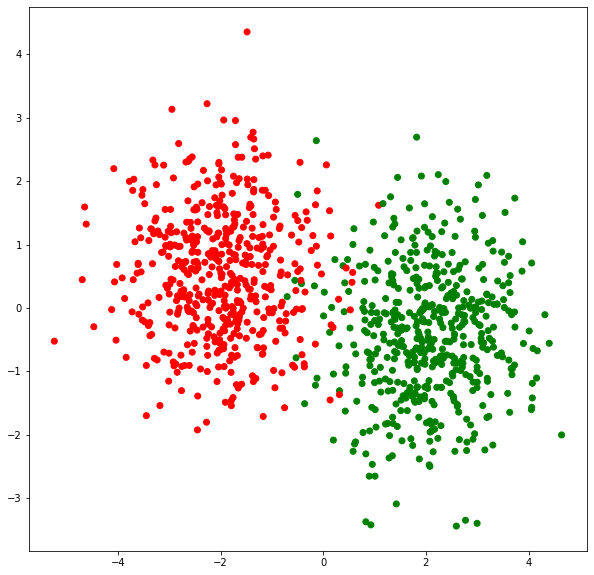

In [23]:
X, y = make_blobs(n_samples=1000, centers = [[-2,0.5],[2,-0.5]], cluster_std=1, random_state=42)

colors = ('red', 'green')
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y==cl] = str(colors[i])
    
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c = colored_y)
plt.show()

In [24]:
regressor = MyLogisticRegression()

regressor.fit(X, y, max_iter=1000)
w = regressor.get_weights()
w

array([-0.17425389,  3.16030443, -0.52351201])

<ipython-input-25-0bc3e100d1ad>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


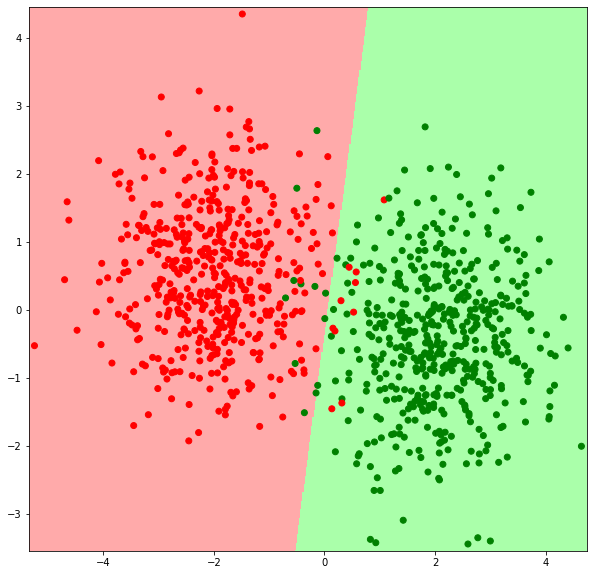

In [25]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(10,10))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))

Z = regressor.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)

<ipython-input-29-ee89474c4499>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy, Z, cmap=plt.get_cmap('viridis'))


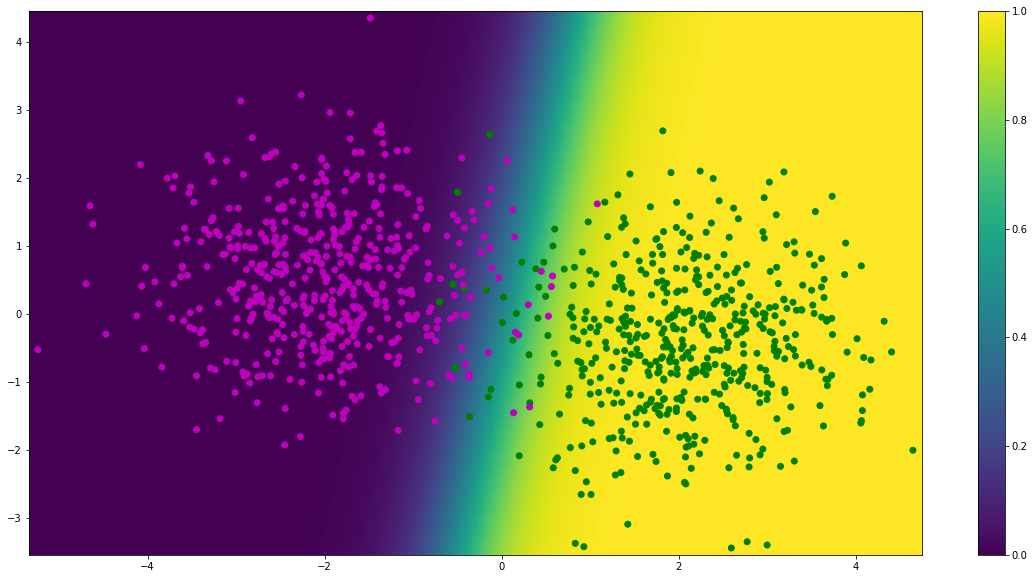

In [29]:
colors = ('magenta', 'green')
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])
    
plt.figure(figsize=(20,10))

Z = regressor.predict_proba(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.pcolormesh(xx,yy, Z, cmap=plt.get_cmap('viridis'))

plt.scatter(X[:, 0], X[:, 1], c = colored_y)
plt.colorbar()
plt.show()